In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Load cleaned data
df = pd.read_csv(r"D:\IPO_analysis\data\ipo_clean.csv", parse_dates=["Date"])

In [4]:
# --- 1. Overview ---
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.describe())


Shape: (561, 16)
Columns: ['Date', 'IPO_Name', 'Issue_Size(crores)', 'QIB', 'HNI', 'RII', 'Total', 'Offer Price', 'List Price', 'Listing Gain', 'CMP(BSE)', 'CMP(NSE)', 'Current Gains', 'Year', 'Month', 'Quarter']
                                Date  Issue_Size(crores)         QIB  \
count                            561          559.000000  561.000000   
mean   2019-02-28 23:00:57.754010880         1407.032021   47.307754   
min              2010-01-04 00:00:00           23.000000    0.000000   
25%              2015-05-26 00:00:00          251.140000    2.280000   
50%              2021-02-05 00:00:00          588.220000   13.470000   
75%              2023-11-07 00:00:00         1224.860000   75.620000   
max              2025-08-06 00:00:00        27858.800000  331.600000   
std                              NaN         2644.873498   63.275518   

              HNI         RII       Total  Offer Price  List Price  \
count  561.000000  561.000000  561.000000   534.000000  511.000000  

C:\Users\Admin\AppData\Local\Temp\ipykernel_15164\1932924893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ipo_counts.index, y=ipo_counts.values, palette="viridis")


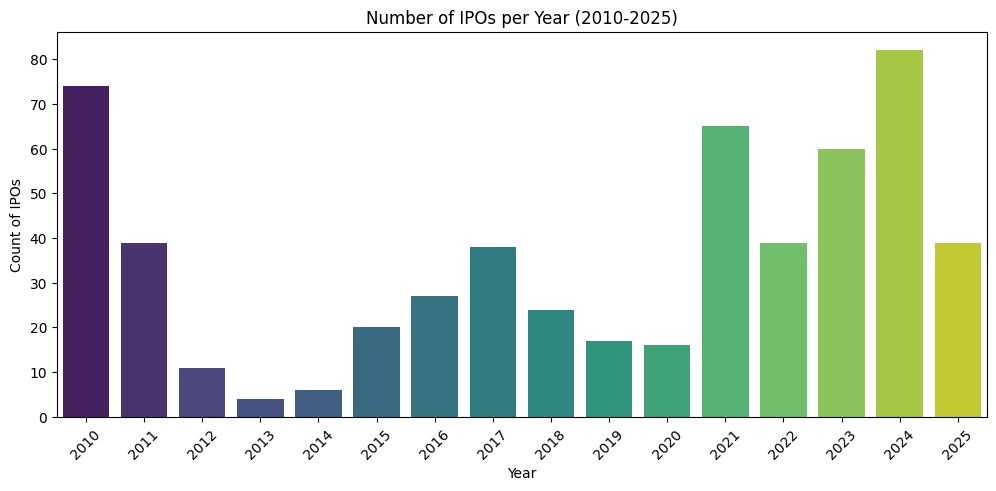

In [5]:
# --- 2. IPO count per year ---
ipo_counts = df.groupby("Year")["IPO_Name"].count()
plt.figure(figsize=(12,5))
sns.barplot(x=ipo_counts.index, y=ipo_counts.values, palette="viridis")
plt.title("Number of IPOs per Year (2010-2025)")
plt.ylabel("Count of IPOs")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()


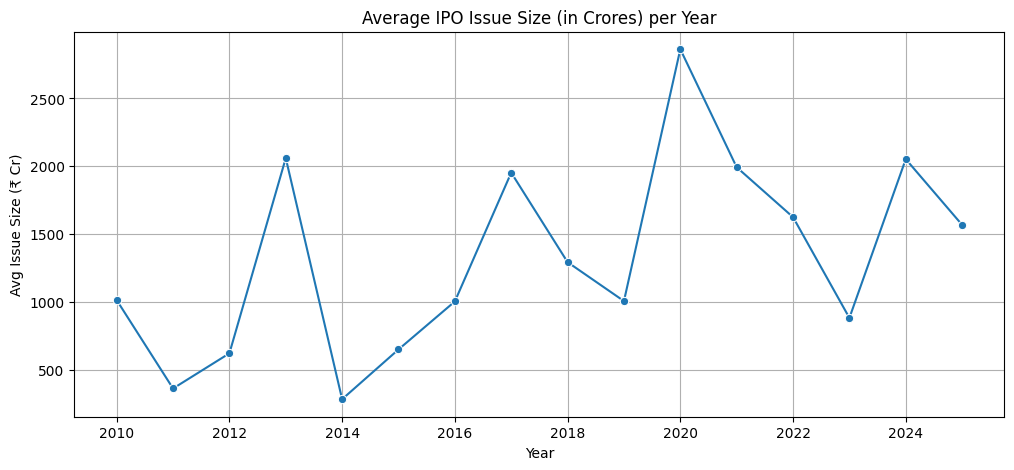

In [6]:
# --- 3. Average Issue Size per year ---
avg_issue = df.groupby("Year")["Issue_Size(crores)"].mean()
plt.figure(figsize=(12,5))
sns.lineplot(x=avg_issue.index, y=avg_issue.values, marker="o")
plt.title("Average IPO Issue Size (in Crores) per Year")
plt.ylabel("Avg Issue Size (₹ Cr)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

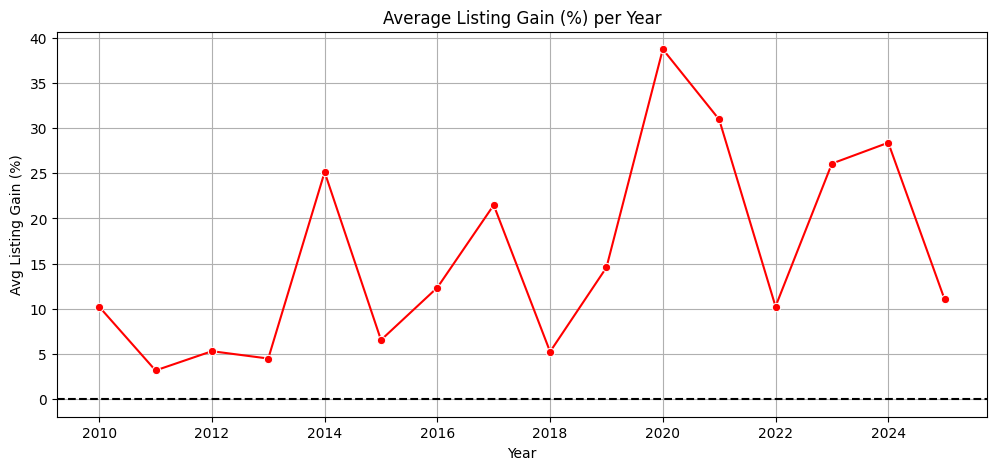

In [7]:
# --- 4. Average Listing Gains per year ---
avg_listing = df.groupby("Year")["Listing Gain"].mean()
plt.figure(figsize=(12,5))
sns.lineplot(x=avg_listing.index, y=avg_listing.values, marker="o", color="red")
plt.title("Average Listing Gain (%) per Year")
plt.ylabel("Avg Listing Gain (%)")
plt.xlabel("Year")
plt.axhline(0, color="black", linestyle="--")
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

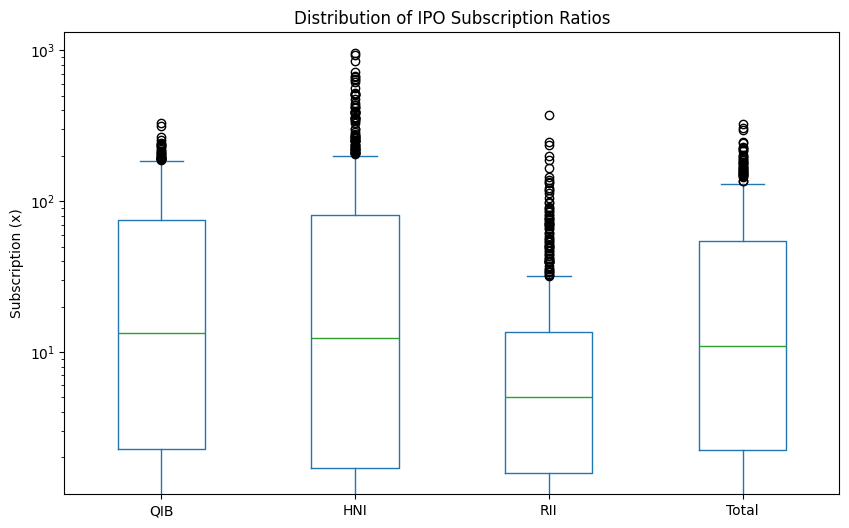

In [8]:
# --- 5. Distribution of Subscription Ratios ---
plt.figure(figsize=(12,6))
df[["QIB","HNI","RII","Total"]].plot(kind="box", figsize=(10,6))
plt.title("Distribution of IPO Subscription Ratios")
plt.yscale("log")   # log scale because oversubscription can be huge
plt.ylabel("Subscription (x)")
plt.show()

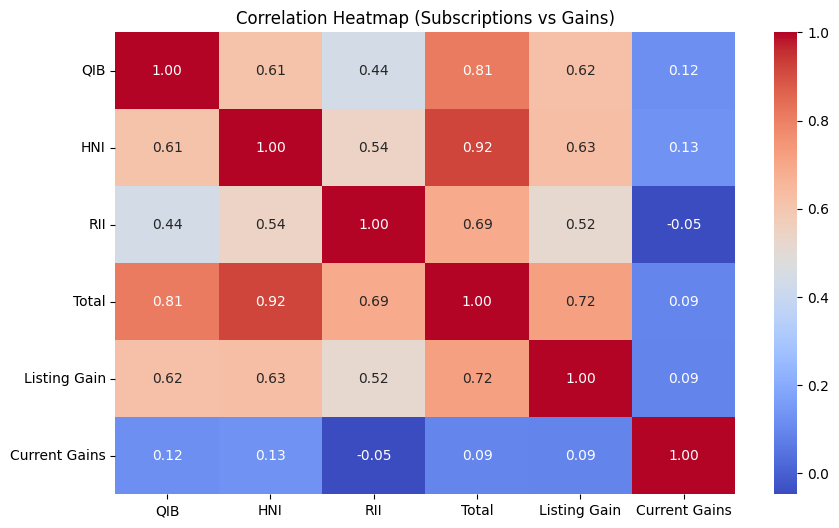

In [9]:
# --- 6. Correlation Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df[["QIB","HNI","RII","Total","Listing Gain","Current Gains"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Subscriptions vs Gains)")
plt.show()


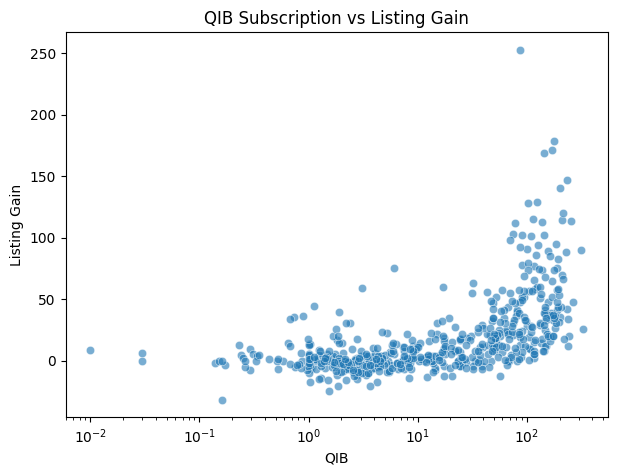

In [10]:
# --- 7. Scatterplots: Relationships ---
plt.figure(figsize=(7,5))
sns.scatterplot(x="QIB", y="Listing Gain", data=df, alpha=0.6)
plt.title("QIB Subscription vs Listing Gain")
plt.xscale("log")
plt.show()

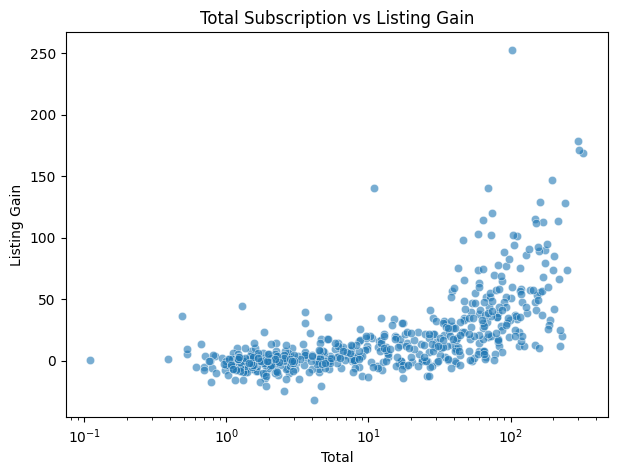

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Total", y="Listing Gain", data=df, alpha=0.6)
plt.title("Total Subscription vs Listing Gain")
plt.xscale("log")
plt.show()


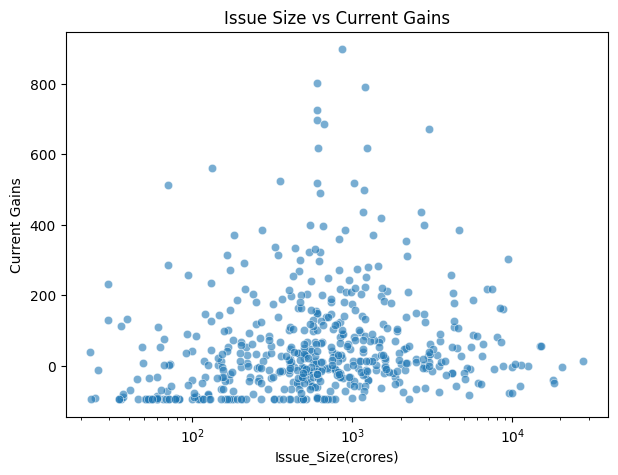

In [12]:

plt.figure(figsize=(7,5))
sns.scatterplot(x="Issue_Size(crores)", y="Current Gains", data=df, alpha=0.6)
plt.title("Issue Size vs Current Gains")
plt.xscale("log")
plt.show()


In [13]:
# --- 8. Top Gainers & Losers ---
top_listing = df.sort_values("Listing Gain", ascending=False).head(10)[["Date","IPO_Name","Listing Gain","Current Gains"]]
worst_listing = df.sort_values("Listing Gain").head(10)[["Date","IPO_Name","Listing Gain","Current Gains"]]

top_current = df.sort_values("Current Gains", ascending=False).head(10)[["Date","IPO_Name","Listing Gain","Current Gains"]]
worst_current = df.sort_values("Current Gains").head(10)[["Date","IPO_Name","Listing Gain","Current Gains"]]

print("\n🔥 Top 10 Day-1 Gainers:\n", top_listing)
print("\n💀 Top 10 Day-1 Losers:\n", worst_listing)
print("\n🏆 Top 10 Long-Term Winners:\n", top_current)
print("\n📉 Top 10 Long-Term Losers:\n", worst_current)



🔥 Top 10 Day-1 Gainers:
           Date                                      IPO_Name  Listing Gain  \
238 2021-11-15                    Sigachi Industries Limited        252.76   
110 2024-02-20                    Vibhor Steel Tubes Limited        178.81   
242 2021-10-01  Paras Defence and Space Technologies Limited        171.43   
233 2021-11-23                         Latent View Analytics        169.04   
45  2024-12-27                      Mamata Machinery Limited        146.91   
133 2023-11-30                     Tata Technologies Limited        139.99   
364 2017-07-25                Salasar Techno Engineering Ltd        139.95   
116 2024-02-06                        BLS E-Services Limited        128.89   
342 2017-12-29                 Astron Paper & Board Mill Ltd        128.00   
81  2024-09-03                      Premier Energies Limited        120.22   

     Current Gains  
238         -80.60  
110           4.77  
242         272.60  
233         101.78  
45        

In [14]:
# --- 9. Portfolio Simulation ---
capital = 10000  # invest 10k in every IPO
invested = capital * len(df)

# Strategy A: Hold all IPOs till now
portfolio_A = (df["Current Gains"]/100 + 1).prod() * capital
print(f"Strategy A (Buy & Hold all IPOs): Final = ₹{portfolio_A:,.2f} on ₹{invested:,.2f}")

# Strategy B: Sell on Day-1
portfolio_B = ((df["Listing Gain"]/100 + 1).prod()) * capital
print(f"Strategy B (Day-1 Flip): Final = ₹{portfolio_B:,.2f} on ₹{invested:,.2f}")

Strategy A (Buy & Hold all IPOs): Final = ₹0.00 on ₹5,610,000.00
Strategy B (Day-1 Flip): Final = ₹37,752,287,046,301,584,539,805,235,814,412,058,624.00 on ₹5,610,000.00
